# Efficient_Net

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


THE FOLLOWING STEPS ARE INVOLVED IN THE ENTIRE PROCESS OF IMAGE CLASSIFICATION

1.IMPORTING LIBRARIES

2.IMAGE PROCESSING

3.MODEL CREATION

4.MODEL COMPILATION

5.MODEL TRAINING

6.MODEL EVALUATION

7.MODEL PREDICTION

STEP 1-importing essential libraries tensorflow is a deep learning framework suitable for applications involving neural networks.

using tensorflow we can build,train,evaluate and predict our neural network.



In [3]:
#importing the essential libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [4]:
train_set='/content/drive/MyDrive/archive-3/train'
val_set='/content/drive/MyDrive/archive-3/val'
test_set='/content/drive/MyDrive/archive-3/test'

STEP 2-image processing
the imagedatagenerator is used to implement data augmentation. we can process the image as we want and create batches of image data.

check this link for further details:- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator



In [5]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen= image.ImageDataGenerator(rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)


In [6]:
# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size = (224,224),
    batch_size = 16,
    shuffle=True,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size = (224,224),
    batch_size = 16,
    class_mode = 'categorical')

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [7]:
train_generator.class_indices

{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

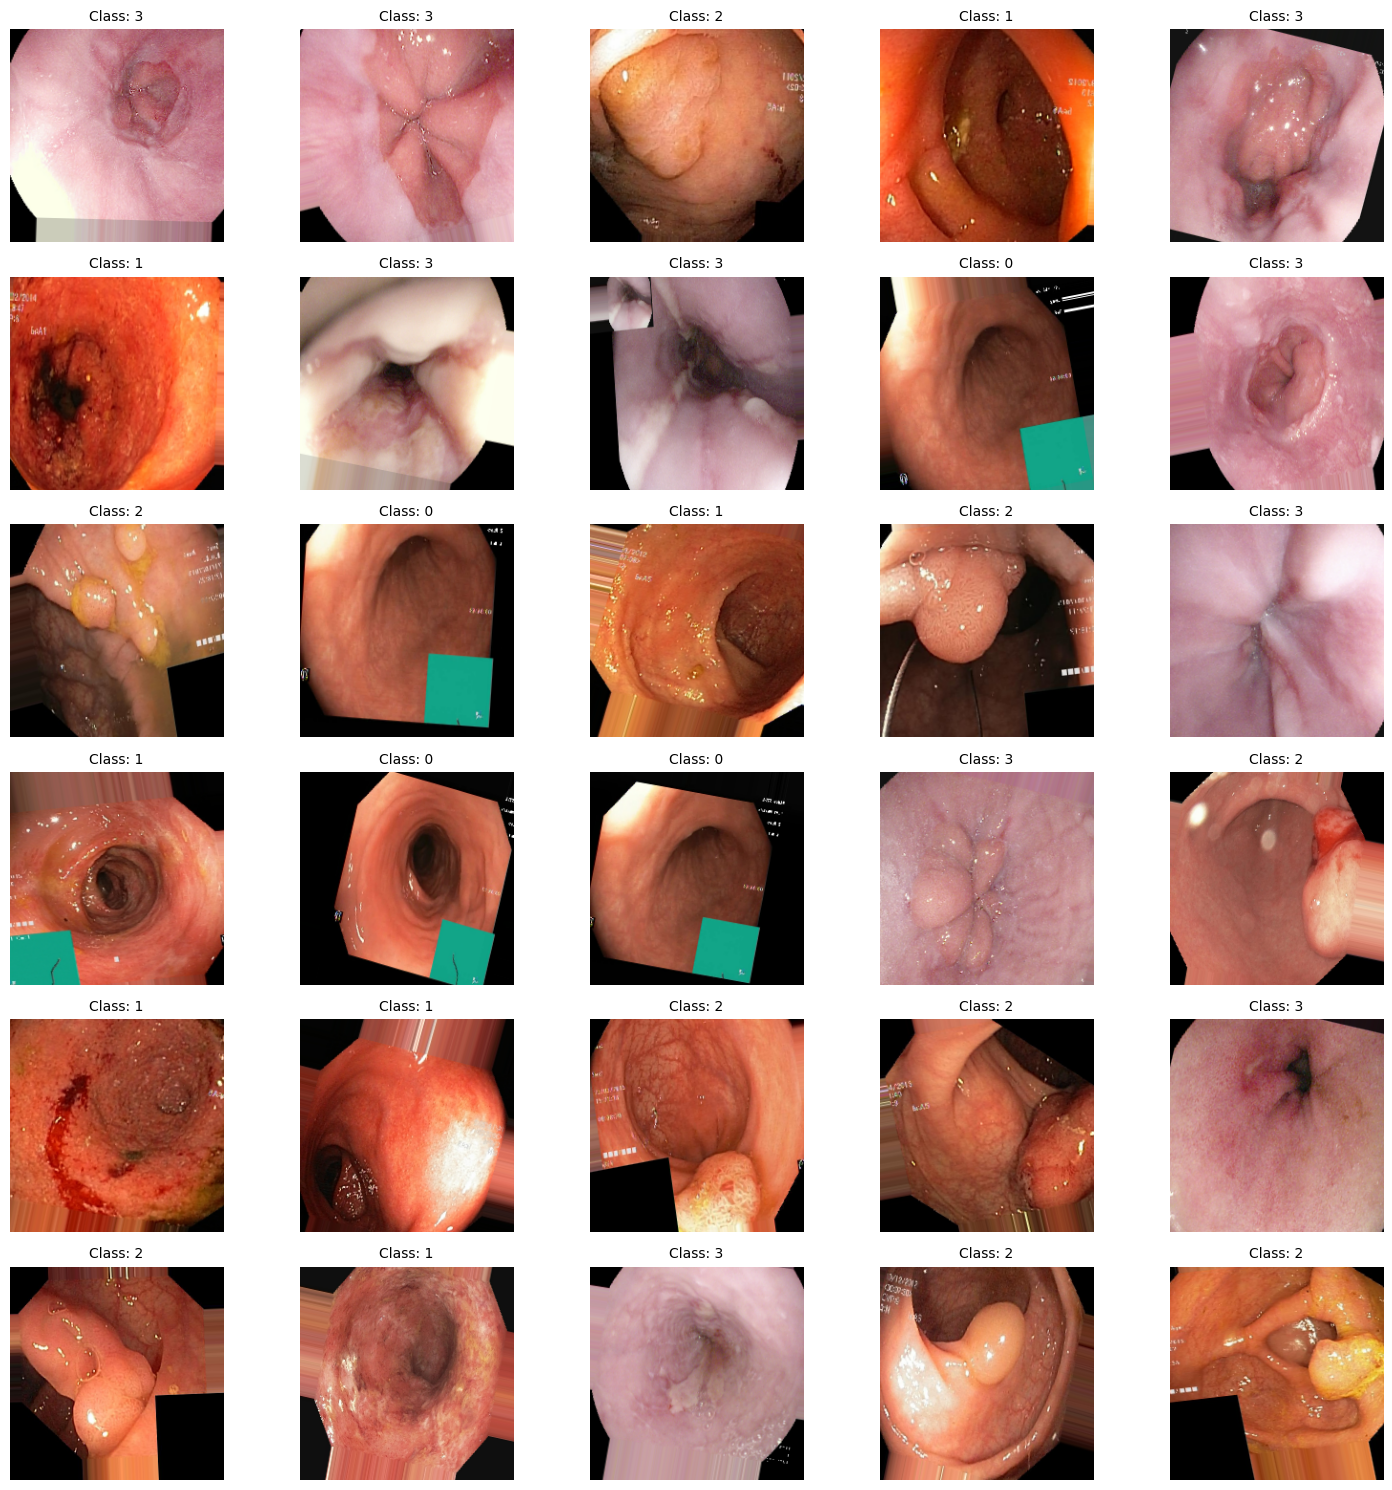

In [8]:
import matplotlib.pyplot as plt

# Set the number of images to display
num_images_to_display = 30

# Initialize a counter for displayed images
displayed_images = 0

# Set the figure size for larger images
plt.figure(figsize=(15, 15))

# Iterate through generator batches until reaching the desired number of displayed images
for batch_images, batch_labels in train_generator:
    batch_size = batch_images.shape[0]
    for i in range(batch_size):
        if displayed_images < num_images_to_display:
            plt.subplot(6, 5, displayed_images + 1)
            plt.imshow(batch_images[i].astype('uint8'))
            plt.title(f"Class: {batch_labels[i].argmax()}", fontsize=10)
            plt.axis("off")
            displayed_images += 1
        else:
            break

    if displayed_images >= num_images_to_display:
        break

# Adjust layout to prevent overlapping titles
plt.tight_layout()
plt.show()


STEP 3-model creation
we are using the pretrained cnn meaning that the cnn is already trained on the imagenet dataset and has the weights stored in it. we are going to customise the model by adding additional layers of our choice(remember more layers can increase parameters leading to overfitting).

we are using the MobileNetV2 model for this application. this model was developed by google in 2017 and is known for its light memory. this model is ideal for devices with less RAM and processing power like microcomputers and mobiles.

input_shape=(224,224,3) => this is the input dimensions of the model. this is the parameter mentioned in the processing part. the 3 refers to the three channels R,G,B

we are training it partially so as to reduce the traning time on the stake of accuracy. (it is better to train model fully for better results)

In [9]:
from tensorflow.keras import regularizers
from keras.regularizers import l2

base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
#model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dense(356,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

31790344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional  (None, 7, 7, 1408)        7768569   
 )                                                               
                                                                 
 gaussian_noise (GaussianNo  (None, 7, 7, 1408)        0         
 ise)                                                            
                                                                 
 global_average_pooling2d (  (None, 1408)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (Batch  (None, 256)               10

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [18]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


Epoch 1/10
200/200 [==============================] - 579s 3s/step - loss: 0.1643 - accuracy: 0.9453 - precision: 0.9488 - recall: 0.9447 - auc: 0.9938 - val_loss: 0.2500 - val_accuracy: 0.9170 - val_precision: 0.9195 - val_recall: 0.9135 - val_auc: 0.9883
Epoch 2/10
200/200 [==============================] - 120s 599ms/step - loss: 0.1352 - accuracy: 0.9528 - precision: 0.9548 - recall: 0.9513 - auc: 0.9951 - val_loss: 0.2334 - val_accuracy: 0.9200 - val_precision: 0.9230 - val_recall: 0.9170 - val_auc: 0.9897
Epoch 3/10
200/200 [==============================] - 156s 779ms/step - loss: 0.1360 - accuracy: 0.9525 - precision: 0.9542 - recall: 0.9509 - auc: 0.9950 - val_loss: 0.2470 - val_accuracy: 0.9020 - val_precision: 0.9076 - val_recall: 0.8990 - val_auc: 0.9886
Epoch 4/10
200/200 [==============================] - 153s 767ms/step - loss: 0.1122 - accuracy: 0.9578 - precision: 0.9593 - recall: 0.9569 - auc: 0.9969 - val_loss: 0.2490 - val_accuracy: 0.9210 - val_precision: 0.9222 - 

Model evaluation
the trained model is evaluated on training, validation and test dataset

In [19]:
model.evaluate(train_generator)

200/200 [==============================] - 71s 355ms/step - loss: 0.0356 - accuracy: 0.9875 - precision: 0.9875 - recall: 0.9875 - auc: 0.9995


[0.035638660192489624,
 0.987500011920929,
 0.987500011920929,
 0.987500011920929,
 0.9995478391647339]

In [20]:
model.evaluate(test_generator)


50/50 [==============================] - 310s 6s/step - loss: 0.2634 - accuracy: 0.9062 - precision: 0.9072 - recall: 0.9038 - auc: 0.9899


[0.26341503858566284,
 0.90625,
 0.9071518182754517,
 0.9037500023841858,
 0.9898950457572937]

Performance

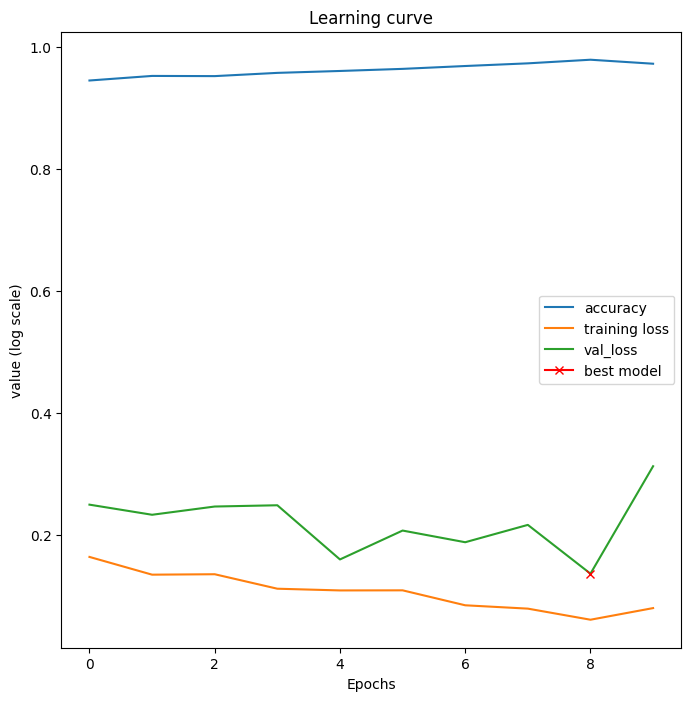

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(history.history["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend()

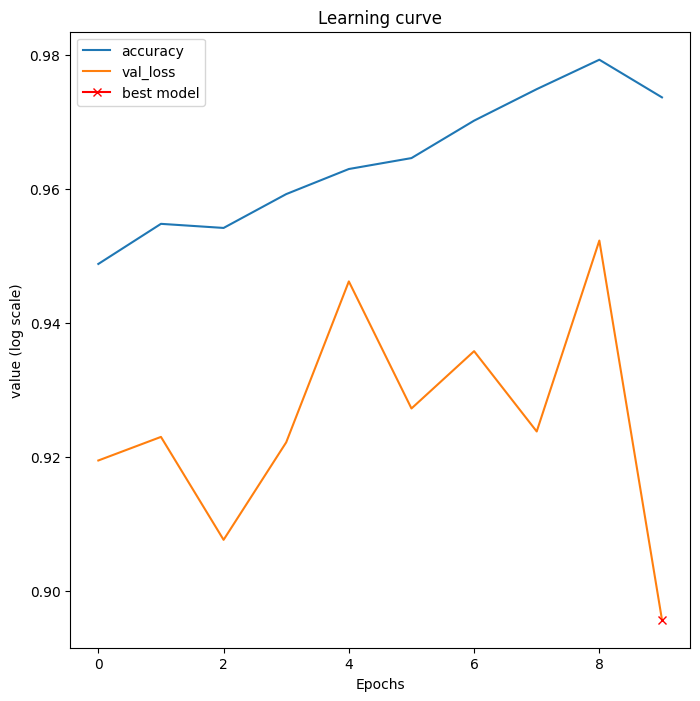

In [22]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(history.history["precision"], label="accuracy")
plt.plot(history.history["val_precision"], label="val_loss")
plt.plot( np.argmin(history.history["val_precision"]), np.min(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value (log scale)")
plt.legend();

1/1 [==============================] - 0s 128ms/step
[[1.5223039e-08 1.4787011e-09 3.0490299e-09 1.0000000e+00]]
THE UPLOADED IMAGE SEEMS TO BE: Esophagitis


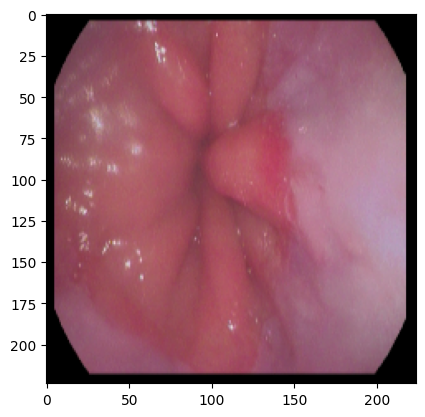

In [30]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Gastrovision-2/Esophagitis/0ad8f762-0fa6-46fd-b98d-a1b401f5ca5c.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

1/1 [==============================] - 0s 29ms/step
[[2.3852754e-06 1.9014320e-01 8.0982125e-01 3.3188811e-05]]
THE UPLOADED IMAGE SEEMS TO BE: Polyp


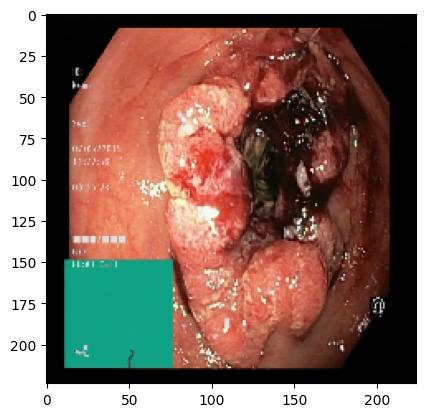

In [31]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Gastrovision-2/Colorectal cancer/02c18e5f-6c77-4104-bff2-238f587b1c28.jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))

1/1 [==============================] - 0s 30ms/step
[[9.9996567e-01 1.4125806e-05 7.1455310e-07 1.9587702e-05]]
THE UPLOADED IMAGE SEEMS TO BE: Normal


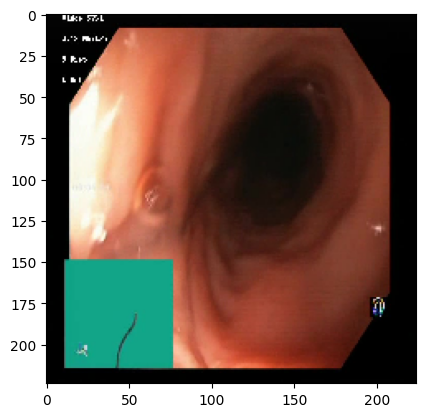

In [34]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive-3/test/0_normal/test_normal_ (112).jpg',target_size=(224,224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=np.argmax(ypred,-1)
if a==0:
    op="Normal"
elif a==1:
    op="Ulcerative colitis"
elif a==2:
    op="Polyp"
else:
    op="Esophagitis"

plt.imshow(img)
print("THE UPLOADED IMAGE SEEMS TO BE: "+str(op))